In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn import cross_validation


In [2]:
'''
#read serie A data
df_cal   = pd.read_csv("../data/serieA_1516.csv")
df_cal_2 = pd.read_csv("../data/serieA_1415.csv")
df_cal_3 = pd.read_csv("../data/serieA_1314.csv")
df_cal_4 = pd.read_csv("../data/serieA_1213.csv")
df_cal_5 = pd.read_csv("../data/serieA_1112.csv")
#read EPL data
#df_cal   = pd.read_csv("../data/EPL-1516.csv")
df_cal_2 = pd.read_csv("../data/EPL-1415.csv")
df_cal_3 = pd.read_csv("../data/EPL-1314.csv")
df_cal_4 = pd.read_csv("../data/EPL-1213.csv")
df_cal_5 = pd.read_csv("../data/EPL-1112.csv")
'''
#read La Liga data
df_cal   = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/SP1.csv")
df_cal_2 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1415/SP1.csv")
df_cal_3 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1314/SP1.csv")
df_cal_4 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1213/SP1.csv")
df_cal_5 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1112/SP1.csv")

df_cal_2.head(10)
df_cal_2.keys()

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'HS', u'AS', u'HST', u'AST', u'HF', u'AF',
       u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H', u'B365D', u'B365A',
       u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA', u'LBH', u'LBD', u'LBA',
       u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA', u'SJH', u'SJD', u'SJA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

In [3]:
def get_teams(df):
    
    teams = []
    
    for i,cal in enumerate(df.iterrows()):
        teams.append(cal[1]["HomeTeam"])
        teams.append(cal[1]["AwayTeam"])

        if i == 9: 
            return teams


In [4]:
teams_a  = get_teams(df_cal)
teams_a2 = get_teams(df_cal_2)
teams_a3 = get_teams(df_cal_3)
teams_a4 = get_teams(df_cal_4)
teams_a5 = get_teams(df_cal_5)

print teams_a2
print teams_a3
print teams_a4
print teams_a5


['Almeria', 'Espanol', 'Granada', 'La Coruna', 'Malaga', 'Ath Bilbao', 'Sevilla', 'Valencia', 'Barcelona', 'Elche', 'Celta', 'Getafe', 'Eibar', 'Sociedad', 'Levante', 'Villarreal', 'Real Madrid', 'Cordoba', 'Vallecano', 'Ath Madrid']
['Sociedad', 'Getafe', 'Valencia', 'Malaga', 'Valladolid', 'Ath Bilbao', 'Barcelona', 'Levante', 'Osasuna', 'Granada', 'Real Madrid', 'Betis', 'Sevilla', 'Ath Madrid', 'Almeria', 'Villarreal', 'Celta', 'Espanol', 'Vallecano', 'Elche']
['Celta', 'Malaga', 'Mallorca', 'Espanol', 'Sevilla', 'Getafe', 'Ath Bilbao', 'Betis', 'Barcelona', 'Sociedad', 'Levante', 'Ath Madrid', 'Real Madrid', 'Valencia', 'La Coruna', 'Osasuna', 'Vallecano', 'Granada', 'Zaragoza', 'Valladolid']
['Granada', 'Betis', 'Sp Gijon', 'Sociedad', 'Valencia', 'Santander', 'Ath Bilbao', 'Vallecano', 'Ath Madrid', 'Osasuna', 'Getafe', 'Levante', 'Mallorca', 'Espanol', 'Sevilla', 'Malaga', 'Zaragoza', 'Real Madrid', 'Barcelona', 'Villarreal']


**Definition of features**

In [9]:
def build_features(df, teams):

    team_features = []
    
    for team in teams:
        #print team_a
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]
        
        #shots made
        team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
        #shots on-target made
        team_st   = team_away["AST"].sum() + team_home["HST"].sum()
        #shots conceded
        team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
        #shots on-target conceded
        team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
        #corners awarded
        team_c    = team_away["AC"].sum()  + team_home["HC"].sum()
        #corners conceded
        team_cc    = team_away["HC"].sum()  + team_home["AC"].sum()
        #woodwork hit
        #team_w    = team_away["AHW"].sum()  + team_home["HHW"].sum()
        #woodwork conceded
        #team_wc = team_away["HHW"].sum()  + team_home["AHW"].sum()

        team_features.append([team_s,team_sc,team_st,team_stc,team_c,team_cc])

    return team_features
    

In [10]:
def build_target(df, teams):

    team_target = []
    
    for team in teams:
        #print team_a
        t      = df[(df['HomeTeam']==team) | (df['AwayTeam']==team)]
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]

        team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
        team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
        team_draw = len(t[t['FTAG']==t['FTHG']])

        team_points = 3*team_a_win + 3*team_h_win + team_draw
        team_target.append(team_points)

    return team_target


In [11]:
feat_test = build_features(df_cal,teams_a)
targ_test = build_target(df_cal,teams_a)

print len(feat_test)
print len(targ_test)

print feat_test
print targ_test

20
20
[[448, 405, 166, 144, 193, 197], [460, 537, 182, 173, 253, 206], [480, 369, 166, 101, 207, 143], [419, 480, 164, 182, 150, 188], [388, 491, 144, 175, 179, 188], [432, 474, 144, 191, 183, 205], [451, 411, 156, 153, 191, 210], [457, 413, 157, 155, 199, 199], [501, 471, 179, 192, 227, 192], [396, 516, 138, 183, 185, 243], [454, 376, 163, 138, 207, 175], [604, 365, 267, 130, 222, 133], [392, 518, 125, 194, 164, 218], [342, 452, 132, 133, 174, 217], [433, 503, 143, 184, 165, 208], [444, 461, 155, 162, 196, 178], [371, 538, 122, 211, 167, 172], [710, 428, 290, 144, 257, 164], [429, 436, 130, 177, 148, 218], [419, 386, 153, 154, 173, 186]]
[48, 52, 88, 44, 43, 36, 42, 48, 38, 44, 62, 91, 45, 64, 32, 60, 39, 90, 39, 43]


In [13]:
#features = build_features(df_cal,teams_a) + build_features(df_cal_2,teams_a2) + build_features(df_cal_3,teams_a3) + build_features(df_cal_4,teams_a4) + build_features(df_cal_5,teams_a5)
features = build_features(df_cal_2,teams_a2) + build_features(df_cal_3,teams_a3) + build_features(df_cal_4,teams_a4) + build_features(df_cal_5,teams_a5)


#target  = build_target(df_cal,teams_a) + build_target(df_cal_2,teams_a2) + build_target(df_cal_3,teams_a3) + build_target(df_cal_4,teams_a4) + build_target(df_cal_5,teams_a5)

target  = build_target(df_cal_2,teams_a2) + build_target(df_cal_3,teams_a3) + build_target(df_cal_4,teams_a4) + build_target(df_cal_5,teams_a5)


df = pd.DataFrame(features, columns=["shots","shots_ontarget","shots_conceded","shots_conceded_ontarget","corners","corners_conceded"])

df["points"] = target

df.to_csv("../data/proc_data_es.csv")

#print features
#print target

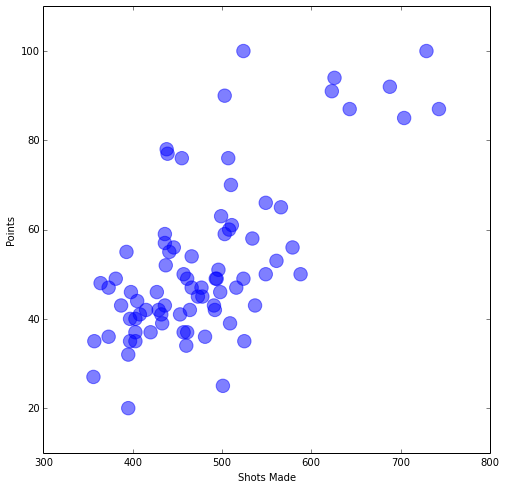

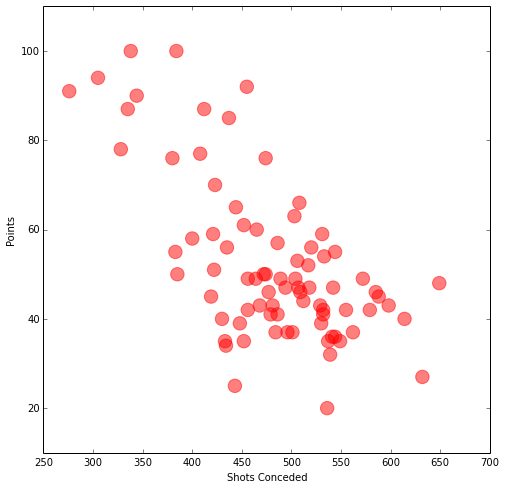

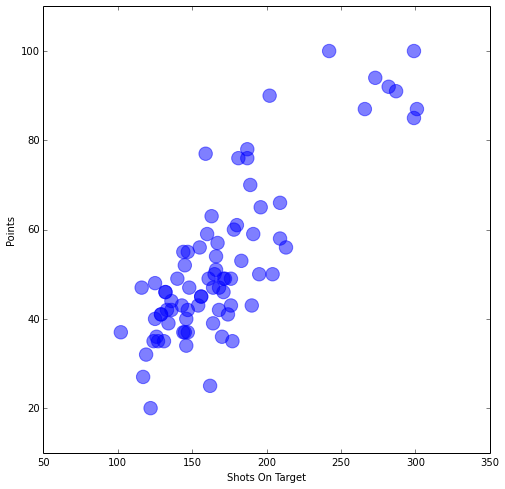

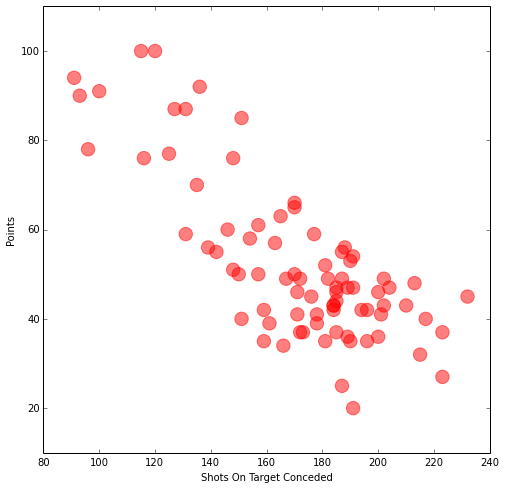

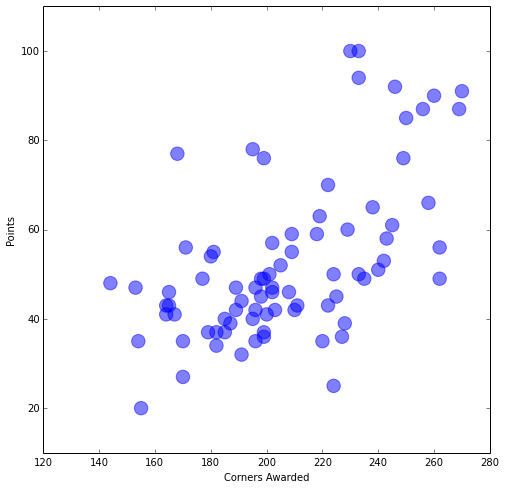

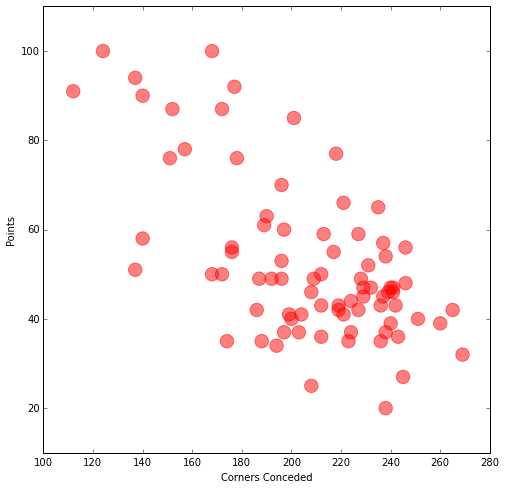

In [14]:
# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,0], target,  color='b',s=180,alpha=0.5)

xlabel('Shots Made')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,1], target,  color='r',s=180,alpha=0.5)

xlabel('Shots Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,2], target,  color='b',s=180,alpha=0.5)

xlabel('Shots On Target')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,3], target,  color='r',s=180,alpha=0.5)

xlabel('Shots On Target Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,4], target,  color='b',s=180,alpha=0.5)

xlabel('Corners Awarded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,5], target,  color='r',s=180,alpha=0.5)

xlabel('Corners Conceded')
ylabel('Points')
